# Introduction

- There is a lot of competition among the brands in the smartwatch industry. Smartwatches are preferred by people who like to take care of their fitness. Analyzing the data collected on your fitness is one of the use cases of Data Science in healthcare. So if you want to learn how to analyze smartwatch fitness data, this notebook is for you. In this notebook, I will take you through the task of Smartwatch Data Analysis using Python.


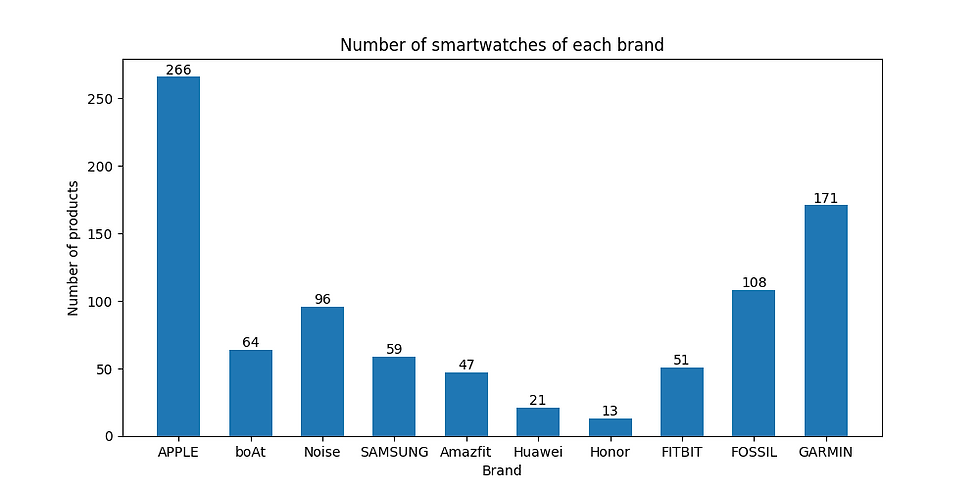

# Predict Clinical Test Results

### Wearable devices could provide early warning signals for underlying health issues
- With the increasing prevalence of smartwatches and fitness trackers, what is the best way to harness the potential of these devices? A team of NIH-funded researchers has an idea—to use these wearable sensors as a way to predict clinical test results, which could potentially serve as an early warning signal for underlying health issues.

- “Consumer wearable devices have enormous untapped potential to facilitate the monitoring—and potentially, the prediction—of human health and disease,” said Grace Peng, Ph.D., director of the NIBIB program in Mathematical Modeling, Simulation and Analysis. “This study, which investigates how data from smartwatches are associated with clinical laboratory tests, is an important step forward in this burgeoning field.”

Ref: [National Institute of Biomedical Imaging and Bioengineering (NIBIB)](https://www.nibib.nih.gov/news-events/newsroom/smartwatch-data-used-predict-clinical-test-results-4)

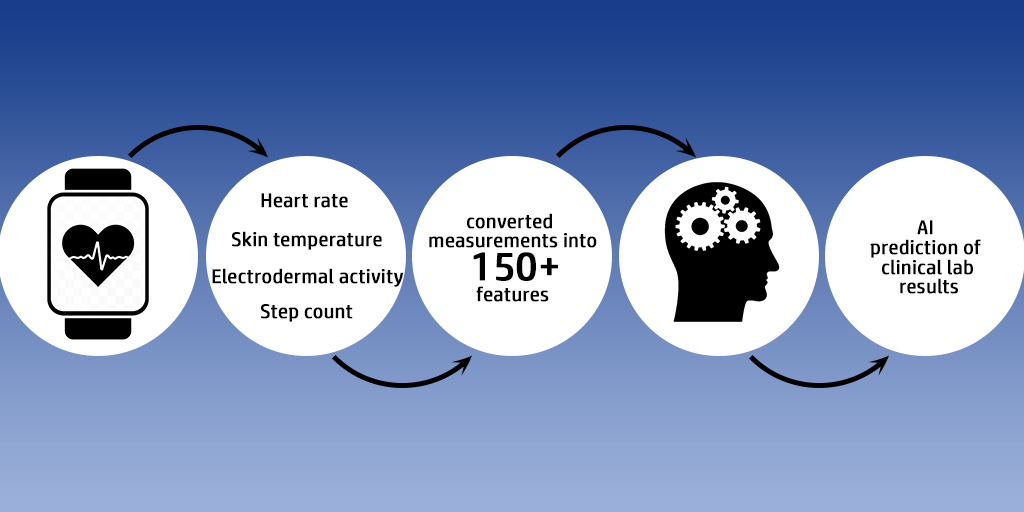


# Intelligent Health Management

### Intelligent health management based on analysis of big data collected by wearable smart watch

- Directed by modern health concepts, advanced medical models, and preventive treatment theory in Traditional Chinese Medicine (TCM), a series of complete, thoughtful, and personalized services established based on health and medical care using information and medical technologies will maintain and improve human health, help people with a healthy lifestyle, reduce disease risk, and stay away from diseases. Once having some clinical symptoms, people can go to see doctors, get treatment promptly, and recover quickly.

- Health management is a kind of preventive medicine tracing the origin and aims to mobilize individual and team enthusiasm. It efficiently uses limited resources and achieves the best results. By health monitoring of individuals and groups, lifestyle-related risk factors will be evaluated, which will provide personalized interventions to reduce disease risk and improve human life quality.

- All aspects of the COVID-19 pandemic influence people's life endow health management with more positive meaning. Health management, by monitoring and evaluating risk factors of disease, especially infectious diseases, helps people with targeted prevention and intervention before diseases develop, and therefore blocks delay, and even prevents the occurrence and development of diseases to achieve the purpose of maintaining good health.

[ScienceDirect](https://www.sciencedirect.com/science/article/pii/S2667241322000246)

# Dataset

- This dataset generated by respondents to a distributed survey via Amazon Mechanical Turk between 03.12.2016-05.12.2016. Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. Individual reports can be parsed by export session ID (column A) or timestamp (column B). Variation between output represents use of different types of Fitbit trackers and individual tracking behaviors / preferences.

# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

# Read Data

In [2]:
data = pd.read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")

In [3]:
print(data.head())

           Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0  1503960366    4/12/2016       13162           8.50             8.50   
1  1503960366    4/13/2016       10735           6.97             6.97   
2  1503960366    4/14/2016       10460           6.74             6.74   
3  1503960366    4/15/2016        9762           6.28             6.28   
4  1503960366    4/16/2016       12669           8.16             8.16   

   LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0                       0.0                1.88                      0.55   
1                       0.0                1.57                      0.69   
2                       0.0                2.44                      0.40   
3                       0.0                2.14                      1.26   
4                       0.0                2.71                      0.41   

   LightActiveDistance  SedentaryActiveDistance  VeryActiveMinutes  \
0                 6.06

# null Values

- Does the dataset contain null values or not?

In [4]:
print(data.isnull().sum())

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64


- So the dataset does not have any null values. 

- Let’s have a look at the information about columns in the dataset:

In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

- The column containing the date of the record is an object. We may need to use dates in our analysis, so let’s convert this column into a datetime column:

In [6]:
# Changing datatype of ActivityDate

data["ActivityDate"] = pd.to_datetime(data["ActivityDate"], 
                                      format="%m/%d/%Y")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

- Look carefully at all the columns. You will see information about very active, moderately active, inactive, and inactive minutes in the dataset.

- Let's combine all these columns as total minutes before moving forward:

In [7]:
data["TotalMinutes"] = data["VeryActiveMinutes"] + data["FairlyActiveMinutes"] + data["LightlyActiveMinutes"] + data["SedentaryMinutes"]
print(data["TotalMinutes"].sample(5))

881     888
821    1002
571     870
364    1440
813    1440
Name: TotalMinutes, dtype: int64


- Let's take a look at the descriptive statistics of the data set:

In [8]:
print(data.describe())

                 Id    TotalSteps  TotalDistance  TrackerDistance  \
count  9.400000e+02    940.000000     940.000000       940.000000   
mean   4.855407e+09   7637.910638       5.489702         5.475351   
std    2.424805e+09   5087.150742       3.924606         3.907276   
min    1.503960e+09      0.000000       0.000000         0.000000   
25%    2.320127e+09   3789.750000       2.620000         2.620000   
50%    4.445115e+09   7405.500000       5.245000         5.245000   
75%    6.962181e+09  10727.000000       7.712500         7.710000   
max    8.877689e+09  36019.000000      28.030001        28.030001   

       LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
count                940.000000          940.000000                940.000000   
mean                   0.108171            1.502681                  0.567543   
std                    0.619897            2.658941                  0.883580   
min                    0.000000            0.000000   

# Analyze the Calories

- The dataset has a “Calories” column; it contains the data about the number of calories burned in a day. 

- Let’s have a look at the relationship between calories burned and the total steps walked in a day:

In [9]:
figure = px.scatter(data_frame = data, x="Calories",
                    y="TotalSteps", size="VeryActiveMinutes", 
                    trendline="ols", 
                    title="Relationship between Calories & Total Steps")
figure.show()

- You can see that there is a linear relationship between the total number of steps and the number of calories burned in a day. 

- Let’s look at the average total number of active minutes in a day:

In [10]:
label = ["Very Active Minutes", "Fairly Active Minutes", 
         "Lightly Active Minutes", "Inactive Minutes"]
counts = data[["VeryActiveMinutes", "FairlyActiveMinutes", 
               "LightlyActiveMinutes", "SedentaryMinutes"]].mean()
colors = ['gold','lightgreen', "pink", "blue"]

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Total Active Minutes')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30,
                  marker=dict(colors=colors, line=dict(color='black', width=3)))
fig.show()

### Chart observations:
- 81.3% of all inactive minutes in a day
- 15.8% of sedentary minutes per day
- On average, only 21 minutes (1.74%) were very active
- 1.11% (13 minutes) of relatively active minutes per day

- Transformed the data type of the ActivityDate column to the datetime column above. 

- Let’s use it to find the weekdays of the records and add a new column to this dataset as “Day”:

In [11]:
data["Day"] = data["ActivityDate"].dt.day_name()
print(data["Day"].head())

0      Tuesday
1    Wednesday
2     Thursday
3       Friday
4     Saturday
Name: Day, dtype: object


- Let’s have a look at the very active, fairly active, and lightly active minutes on each day of the week:

In [12]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=data["Day"],
    y=data["VeryActiveMinutes"],
    name='Very Active',
    marker_color='purple'
))
fig.add_trace(go.Bar(
    x=data["Day"],
    y=data["FairlyActiveMinutes"],
    name='Fairly Active',
    marker_color='green'
))
fig.add_trace(go.Bar(
    x=data["Day"],
    y=data["LightlyActiveMinutes"],
    name='Lightly Active',
    marker_color='pink'
))
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

- Let’s have a look at the number of inactive minutes on each day of the week:

In [13]:
day = data["Day"].value_counts()
label = day.index
counts = data["SedentaryMinutes"]
colors = ['gold','lightgreen', "pink", "blue", "skyblue", "cyan", "orange"]

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Inactive Minutes Daily')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30,
                  marker=dict(colors=colors, line=dict(color='black', width=3)))
fig.show()

- So Thursday is the most inactive day according to the lifestyle of all the individuals in the dataset. 

- Now let’s have a look at the number of calories burned on each day of the week:

In [14]:
calories = data["Day"].value_counts()
label = calories.index
counts = data["Calories"]
colors = ['gold','lightgreen', "pink", "blue", "skyblue", "cyan", "orange"]

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Calories Burned Daily')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30,
                  marker=dict(colors=colors, line=dict(color='black', width=3)))
fig.show()

### Tuesday is, therefore, one of the most active days for all individuals in the dataset, as the highest number of calories were burned on Tuesdays.